<a href="https://colab.research.google.com/github/sdpunwatkar2/Shantanu-GlucoSense-Infy-Nov24/blob/main/GlucoSense_AI_Powered_Diabetes_Detection_for_Early_Interventionn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GlucoSense- AI-Powered Diabetes Detection for Early Intervention**

---
# **Project Overview**

This project aims to build a machine-learning model that classifies individuals as diabetic or non-diabetic based on early medical indicators. The dataset used for this analysis is the Early Diabetes Classification Dataset from Kaggle, which includes key health features such as glucose levels, BMI, age, and insulin levels. The goal is to predict the likelihood of an individual developing diabetes, providing a valuable tool for early intervention and risk assessment.


---
# **Objective**

The main objectives of the project are:

Data Collection and Preprocessing: Gather and clean the dataset to ensure it's suitable for model training.

Model Development: Apply various machine learning algorithms to predict diabetes status.

Model Evaluation: Assess the performance of the models using evaluation metrics such as accuracy, precision, recall, and F1-score.

Feature Importance: Identify the most significant factors contributing to diabetes risk.

---

#1. Importing Libraries



In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
import xgboost as xgb

In [36]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# 2. Importing the Dataset
insertion of the dataset obtained from kaggle.com and cleaning it to manipulate the required data values

In [37]:
!git clone https://github.com/sdpunwatkar2/Shantanu-GlucoSense-Infy-Nov24

fatal: destination path 'Shantanu-GlucoSense-Infy-Nov24' already exists and is not an empty directory.


In [38]:
# Assuming your data is in a CSV file named 'your_data.csv'
df = pd.read_csv('/content/Shantanu-GlucoSense-Infy-Nov24/Glcosense final dataset.csv')

# Display the first few rows of the cleaned DataFrame
print(df.head())


   age gender  polyuria  polydipsia  sudden_weight_loss  weakness  polyphagia  \
0   40   Male         0           1                   0         1           0   
1   58   Male         0           0                   0         1           0   
2   41   Male         1           0                   0         1           1   
3   45   Male         0           0                   1         1           1   
4   60   Male         1           1                   1         1           1   

   genital_thrush  visual_blurring  itching  irritability  delayed_healing  \
0               0                0        1             0                1   
1               0                1        0             0                0   
2               0                0        1             0                1   
3               1                0        1             0                1   
4               0                1        1             1                1   

   partial_paresis  muscle_stiffness  alopec

In [39]:
df.describe()

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

In [41]:
print(df.columns.tolist())

['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity', 'class']


# 3. Checking for missing values

In [42]:
df.isnull().sum()

,0
age,0
gender,0
polyuria,0
polydipsia,0
sudden_weight_loss,0
weakness,0
polyphagia,0
genital_thrush,0
visual_blurring,0
itching,0


# 4. EDA



 Removing Duplicates

In [43]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
# Drop duplicates if they exist
if duplicates > 0:
    data = df.drop_duplicates()
    print("Duplicates removed.")
else:
    print("No duplicates found.")

Number of duplicate rows: 269
Duplicates removed.


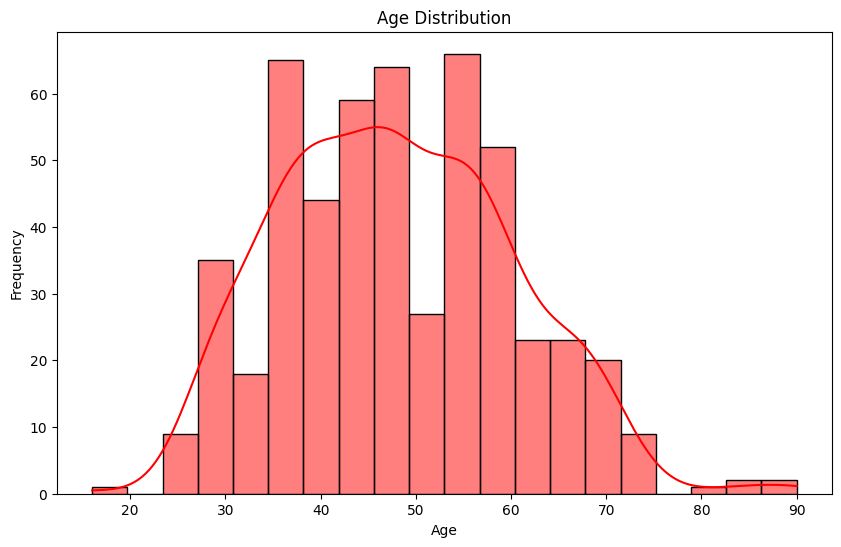

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=20, color='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Diabetes by Gender

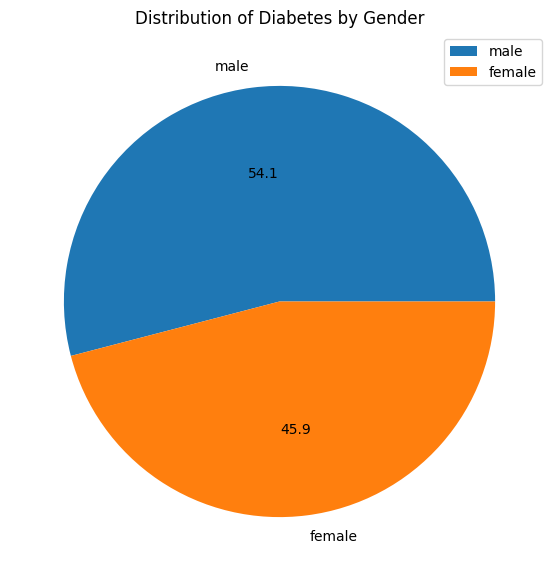

In [45]:
gender_diabetes_counts = df[df['class'] == 1]['gender'].value_counts()
plt.figure(figsize=(9, 7))
plt.pie(gender_diabetes_counts, labels=["male","female"], autopct='%1.1f')
plt.title('Distribution of Diabetes by Gender')
plt.legend()
plt.show()

The resulting pie chart visually represents the proportion of male and female diabetic patients in your dataset. Each slice of the pie will be labeled as "Male" or "Female" and show the percentage of diabetic patients that each gender represents.

This helps you quickly understand the gender distribution among the diabetic patients in your dataset. If, for example, the chart shows that 45.9% of the diabetic patients are female and 54.1% are male, it visually communicates this distribution clearly and effectively.

# Distribution of different symptoms across diabetic patients

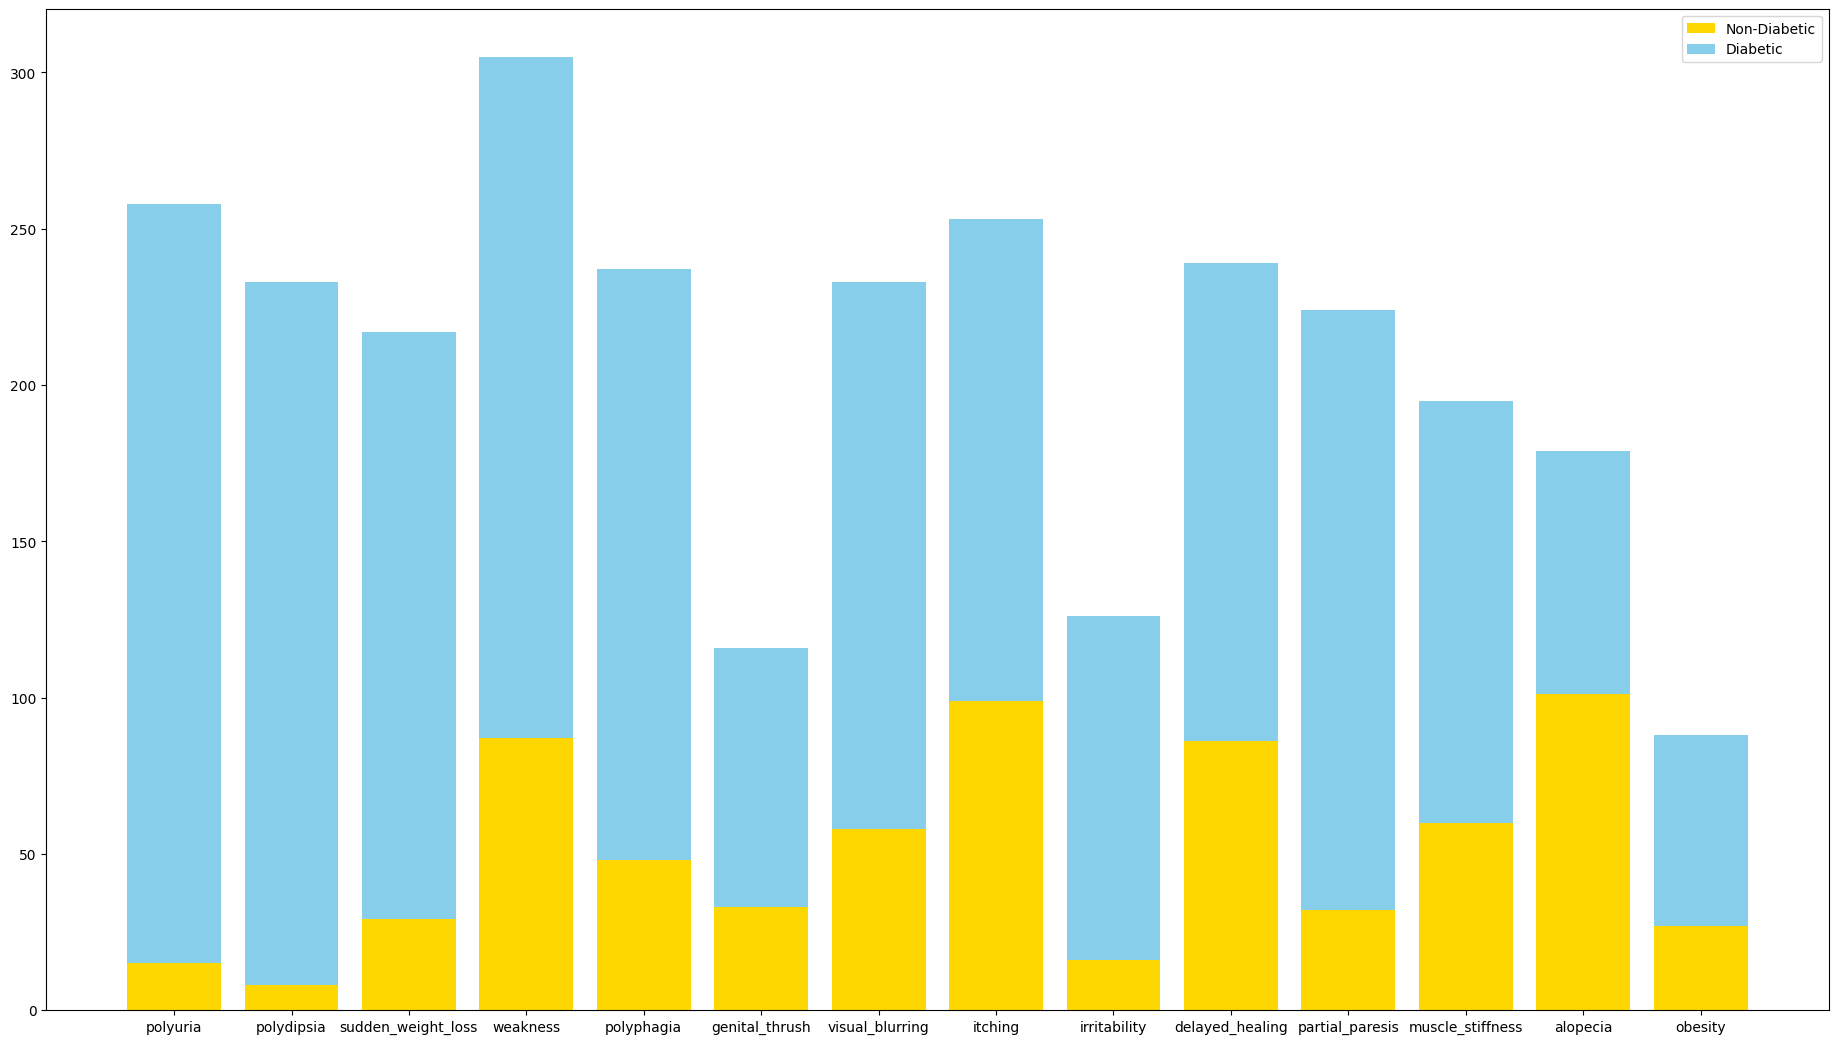

In [46]:
symptoms = df.columns[2:-1]
count_0 = df[df['class'] == 0][symptoms].sum()
count_1 = df[df['class'] == 1][symptoms].sum()
plt.figure(figsize=(23, 13))
plt.bar(symptoms, count_0, label='Non-Diabetic', color='gold')
plt.bar(symptoms, count_1, bottom=count_0, label='Diabetic', color='skyblue')
plt.legend()

The resulting bar chart shows the distribution of different symptoms across diabetic patients. Each bar represents a symptom, with the height of the bar corresponding to the total count of that symptom in diabetic patients. The bottom (commented out part) would represent the non-diabetic counts, if plotted.

This visualization helps to compare how frequently each symptom occurs in diabetic patients relative to non-diabetic patients, providing a clear and intuitive comparison of symptom prevalence.

# Bivariate Analysis

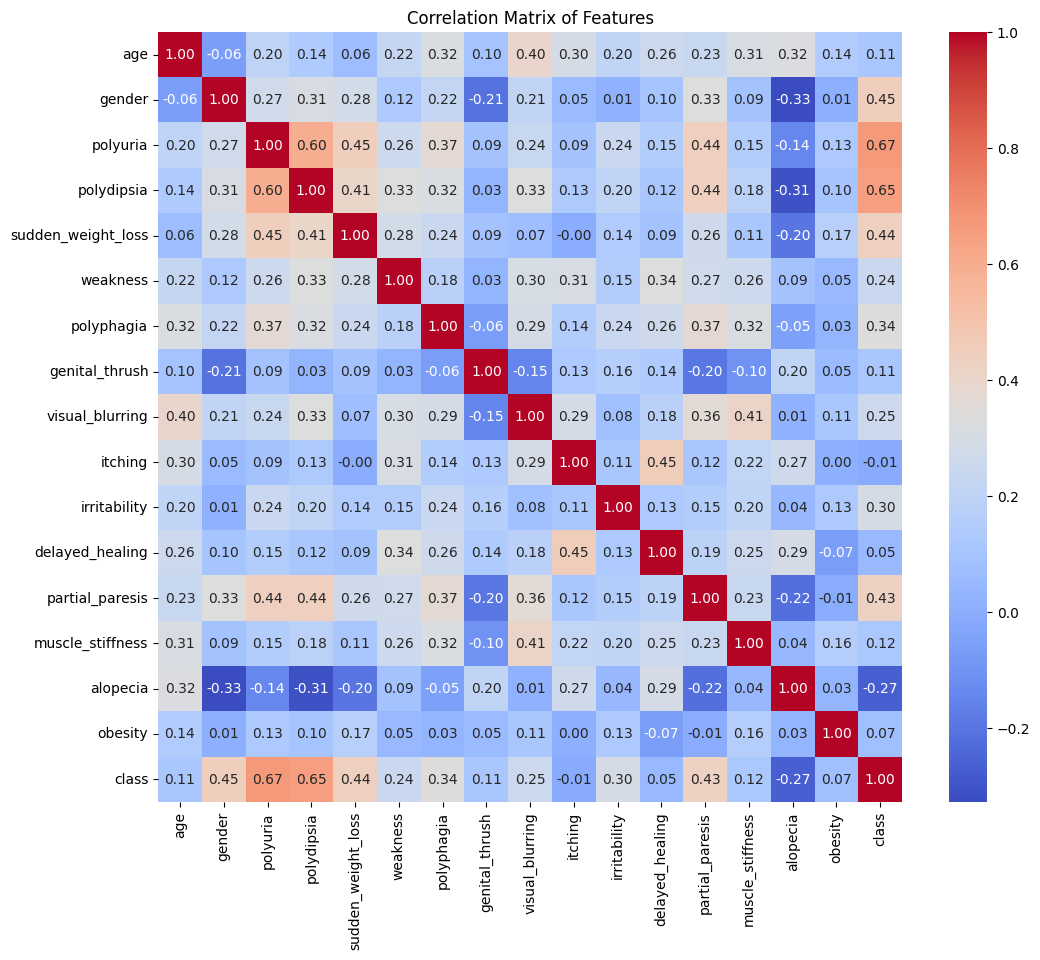

In [47]:
# Map 'gender' column: 'Male' to 0 and 'Female' to 1
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure size
plt.figure(figsize=(12, 10))

# Draw the heatmap with the correlation matrix, and customize it with annotations and color map
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix of Features')
plt.show()


The resulting heatmap visually represents the correlation matrix of the features in your DataFrame. Each cell in the heatmap shows the correlation coefficient between two features, making it easy to see which features are positively or negatively correlated with each other.

For instance:

Strong Positive Correlation: Features with a coefficient close to 1 are strongly positively correlated.

Strong Negative Correlation: Features with a coefficient close to -1 are strongly negatively correlated.

No Correlation: Features with a coefficient close to 0 have little to no correlation.

This visualization helps to identify patterns and relationships between different variables in your dataset, which can be valuable for further analysis and modeling.

# Polyuria values

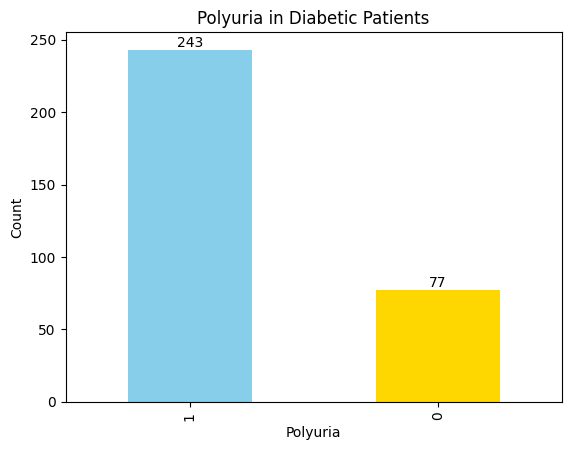

In [48]:
# Count the occurrences of polyuria in diabetic patients (class = 1)
polyuria_diabetes = df[df['class'] == 1]['polyuria'].value_counts()

# Define colors for the bars
colors = ['gold' if value == 0 else 'skyblue' for value in polyuria_diabetes.index]

# Plot the bar chart with specified colors
polyuria_diabetes.plot(kind='bar', color=colors, title='Polyuria in Diabetic Patients')
plt.xlabel('Polyuria')
plt.ylabel('Count')

# Add text annotations on the bars
for i, v in enumerate(polyuria_diabetes):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

# Show the plot
plt.show()


The resulting bar chart will show the counts of polyuria (a symptom of excessive urination) among diabetic patients. There will be two bars:

One for patients without polyuria (value 0), colored green.

One for patients with polyuria (value 1), colored red.

This visualization helps you quickly see the prevalence of polyuria among diabetic patients in your dataset. The counts on top of each bar provide an exact number of patients for each category, making the data easy to interpret.

In [49]:
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['gender'].head()

,gender
0,0
1,0
2,0
3,0
4,0


# Pie charts for various features for Diebetic vs Non Diabetic patients

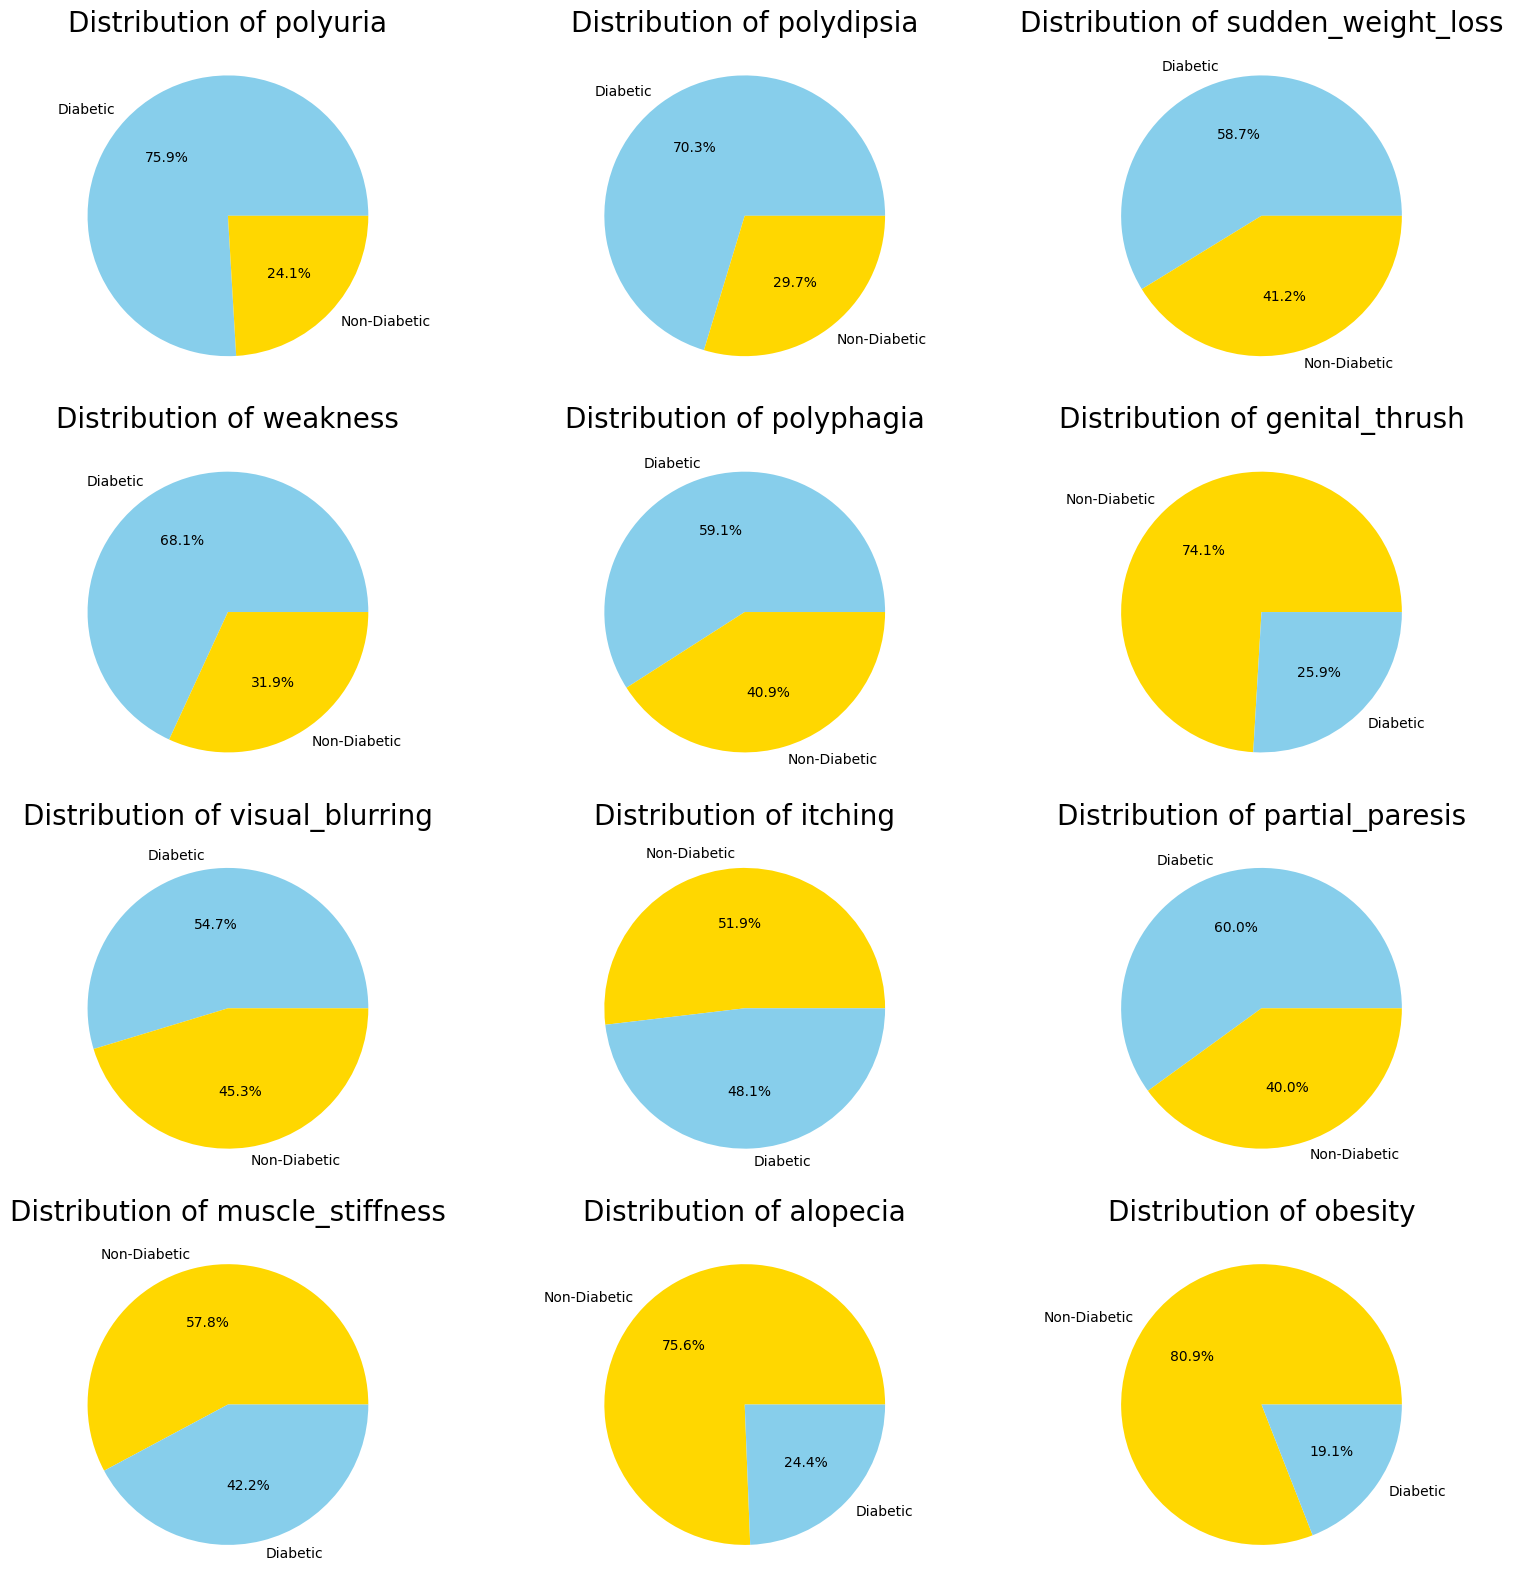

In [50]:


conditions = ['polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia',
              'genital_thrush', 'visual_blurring', 'itching',
              'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']
diabetic_df = df[df['class'] == 1]
fig, axes = plt.subplots(4, 3, figsize=(16, 16))
axes = axes.flatten()
color_map = {1: 'skyblue', 0: 'gold'}
for i, condition in enumerate(conditions):
    diabetic_counts = diabetic_df[condition].value_counts()
    colors = [color_map[label] for label in diabetic_counts.index]

    axes[i].pie(
        diabetic_counts,
        labels=diabetic_counts.index.map({1: 'Diabetic', 0: 'Non-Diabetic'}),
        autopct='%1.1f%%',
        colors=colors
    )
    axes[i].set_title(f"Distribution of {condition}", fontsize=20)

plt.tight_layout()

plt.show()

The final output will be a 4x3 grid of pie charts, each representing the distribution of a specific condition among diabetic patients. The pie charts will show the proportion of patients with each condition (colored red) versus without each condition (colored green).

Red indicates the proportion of diabetic patients with the condition.

Green indicates the proportion of diabetic patients without the condition.

This visualization provides a clear and comprehensive view of how common each condition is among diabetic patients, helping to identify patterns and trends in the symptoms experienced by these patients.

# Distribution of a specific condition or symptom

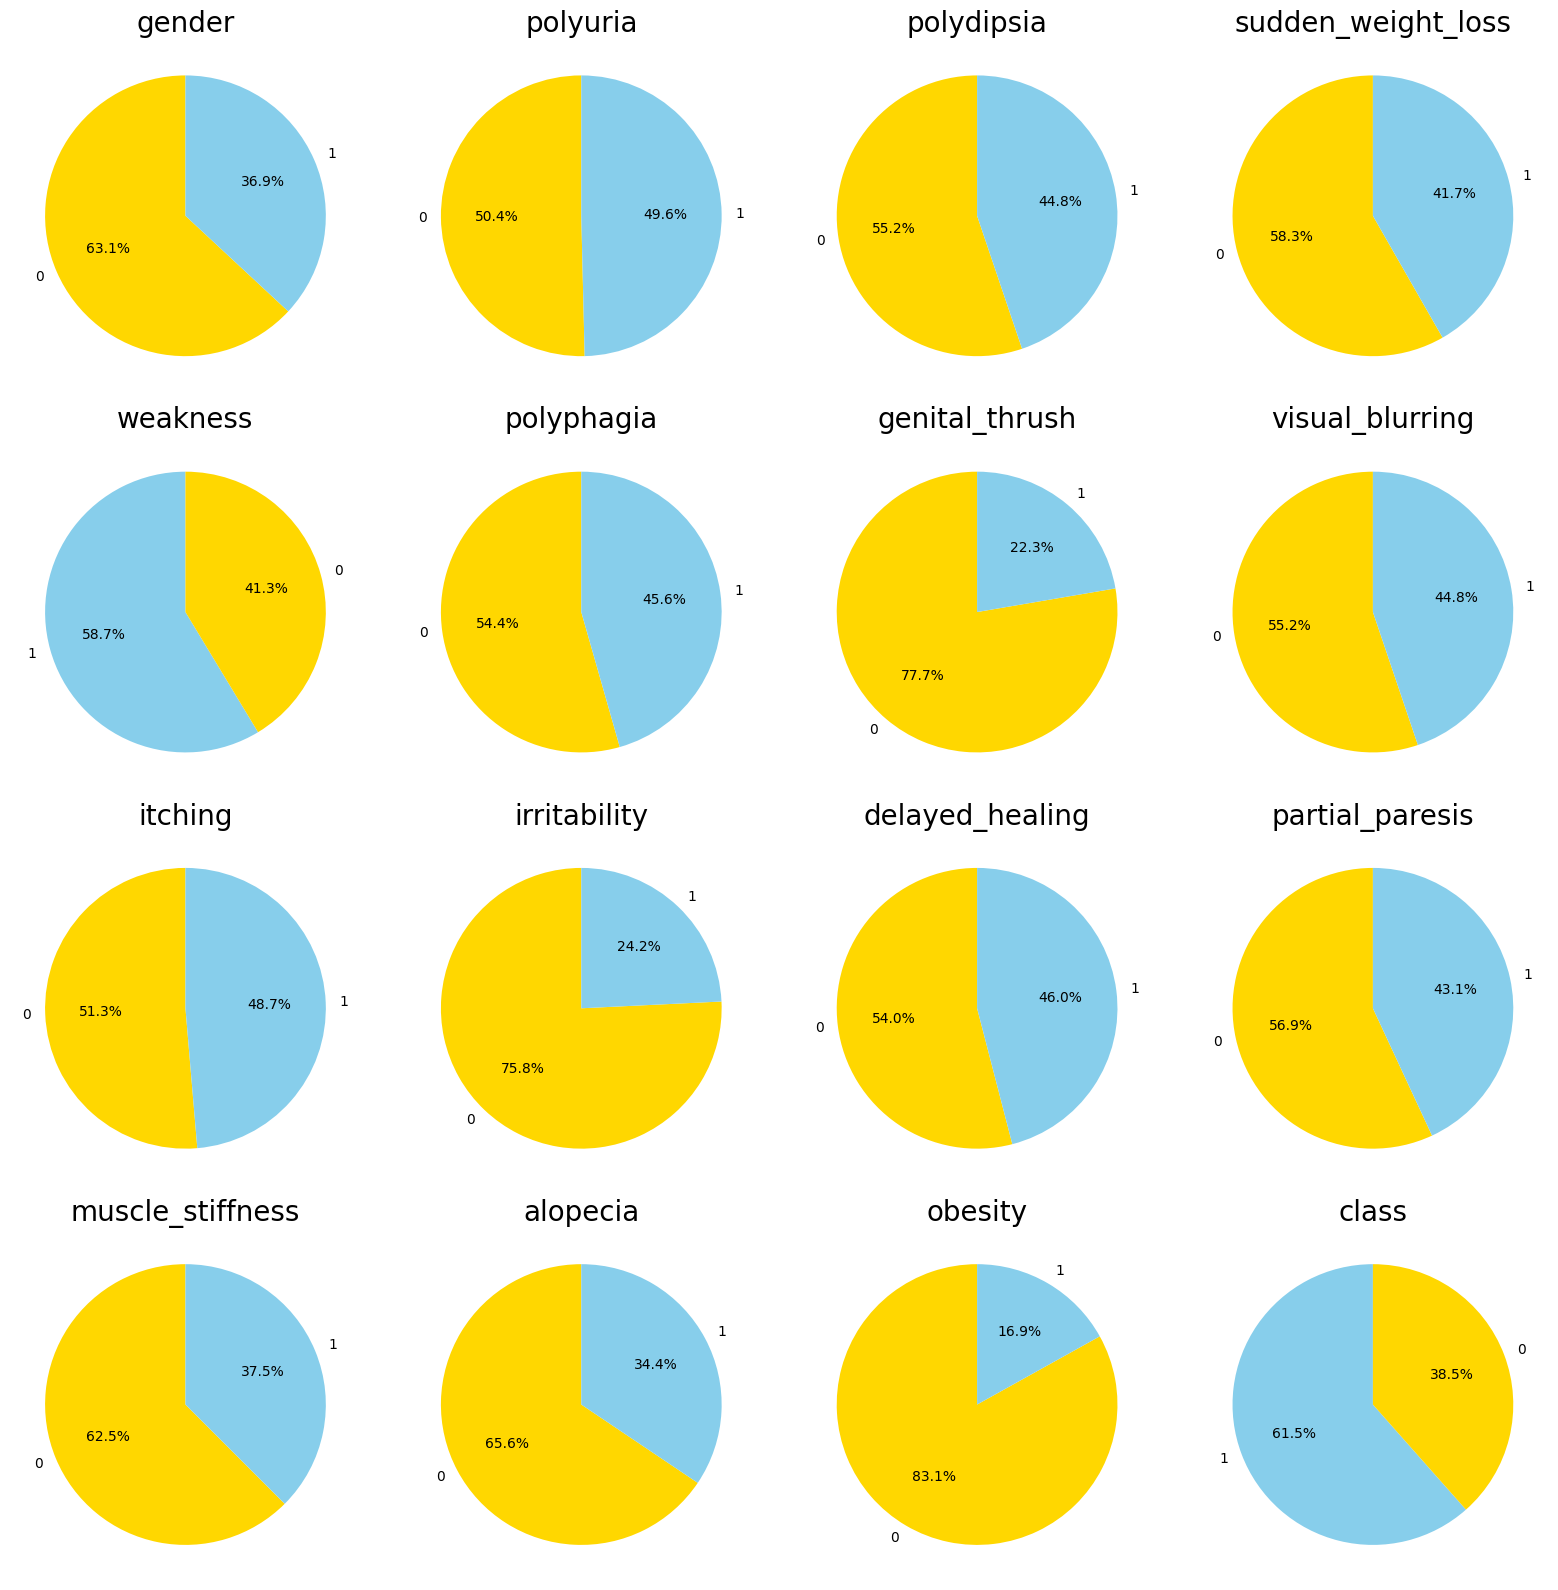

In [51]:
# Setup the figure and axes
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
axes = axes.flatten()

# Define custom colors for values 0 and 1
colors = {0: 'gold', 1: 'skyblue'}

# Iterate over the columns (excluding 'age')
for i, column in enumerate([col for col in df.columns if col != 'age']):
    counts = df[column].value_counts()

    # Map the colors based on the value
    pie_colors = [colors[val] for val in counts.index]

    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=pie_colors)
    axes[i].set_title(column, fontsize=20)

# Turn off any remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Each representing the distribution of a specific condition or symptom in your dataset. The pie charts will show the proportion of occurrences for each value (0 and 1) of these conditions.

Red indicates the proportion of patients with the condition (value 1).

Green indicates the proportion of patients without the condition (value 0).

This visualization provides a clear and comprehensive view of how common each condition is within your dataset, helping to identify patterns and trends in the symptoms experienced by the patients.

# Considering key features using Pairplot

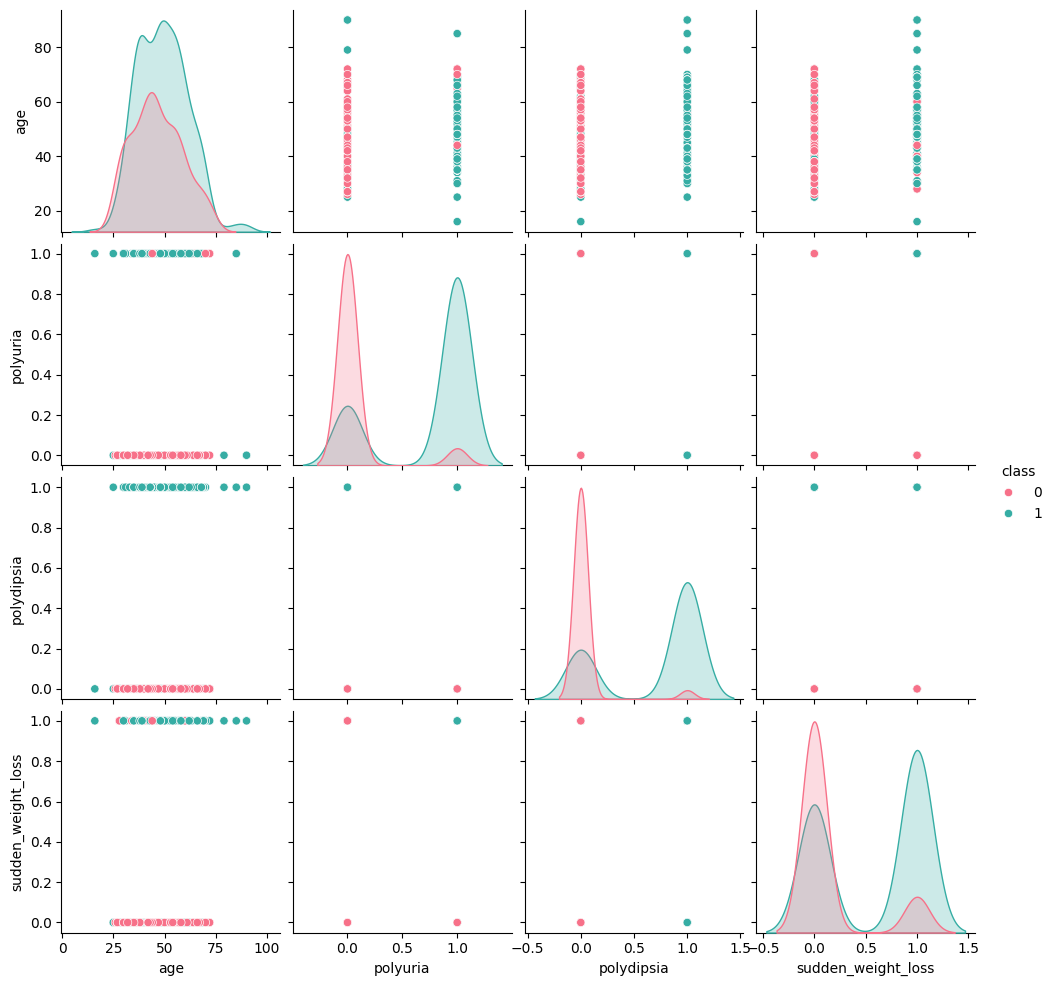

In [52]:
selected_features = ['age', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'class']
sns.pairplot(df[selected_features], hue='class', palette='husl')
plt.show()

The resulting pairplot is a matrix of scatterplots. Each scatterplot shows the relationship between two features from the selected_features list. The main diagonal typically shows the distribution (like histograms) of each feature individually.

Color Coding: Points are color-coded based on the class column. For example, one color represents diabetic patients and another represents non-diabetic patients.

Scatterplots: Each off-diagonal plot shows the relationship between two features. For example, one plot might show how age relates to polyuria, while another might show the relationship between polydipsia and sudden_weight_loss.

Distribution Plots: Diagonal plots often display the distribution of individual features.

This visualization helps you:

Identify patterns and correlations between features.

Understand how different variables interact with respect to the diabetes status.

Spot clusters or trends that can be important for further analysis or modeling.

# Distribution of features Based on Positive Diabetes patients

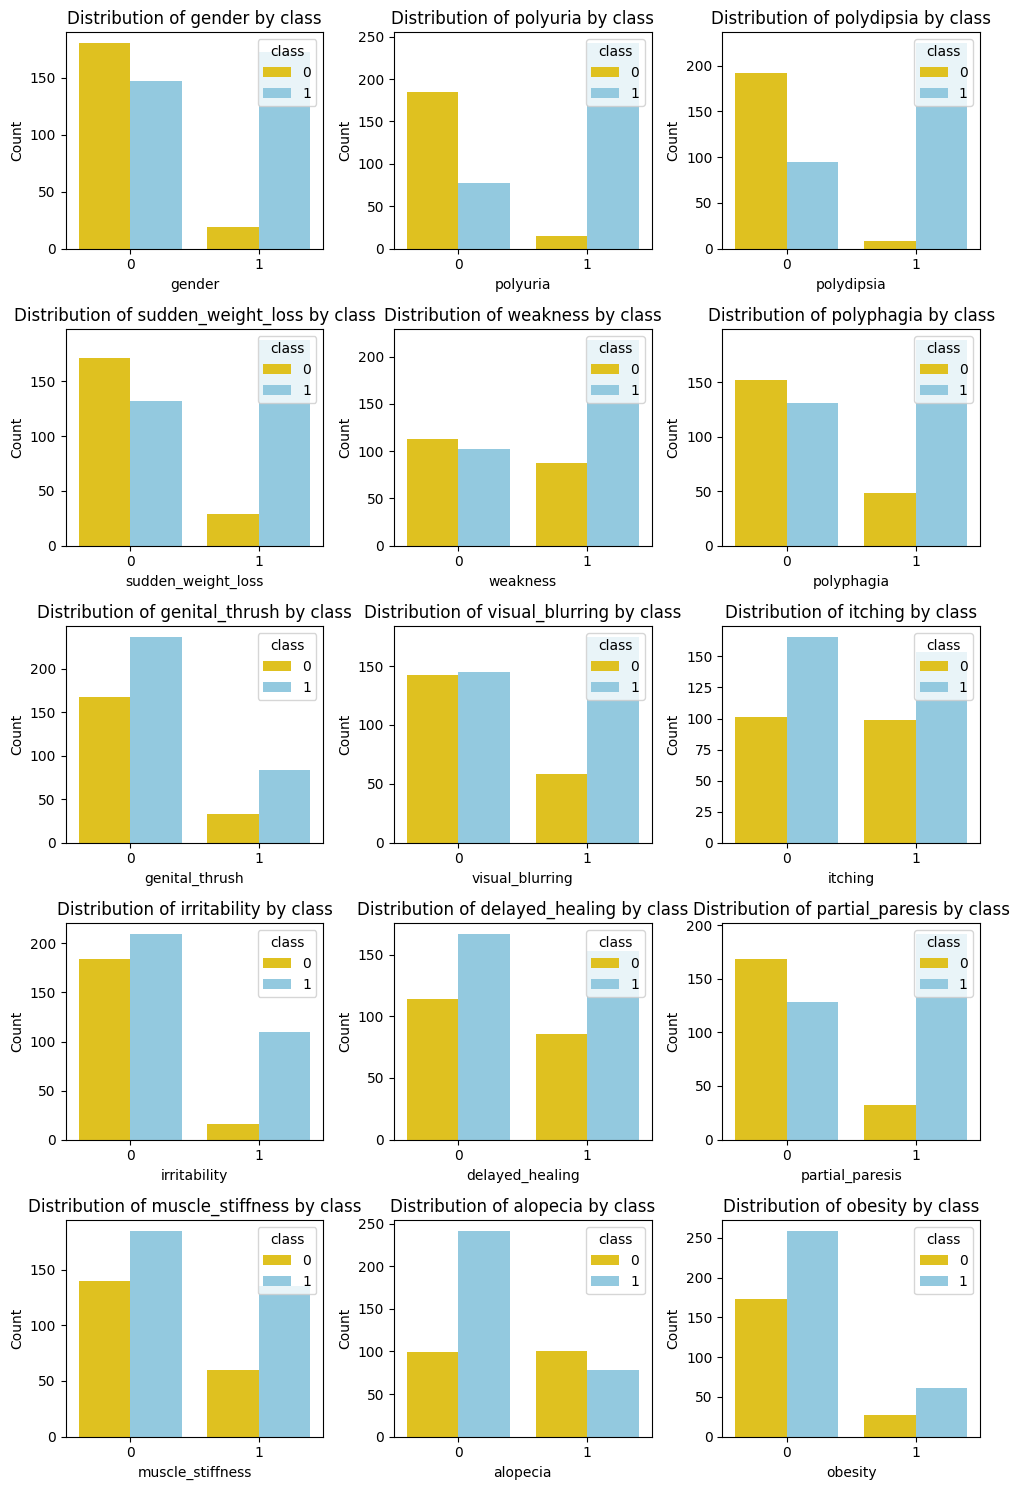

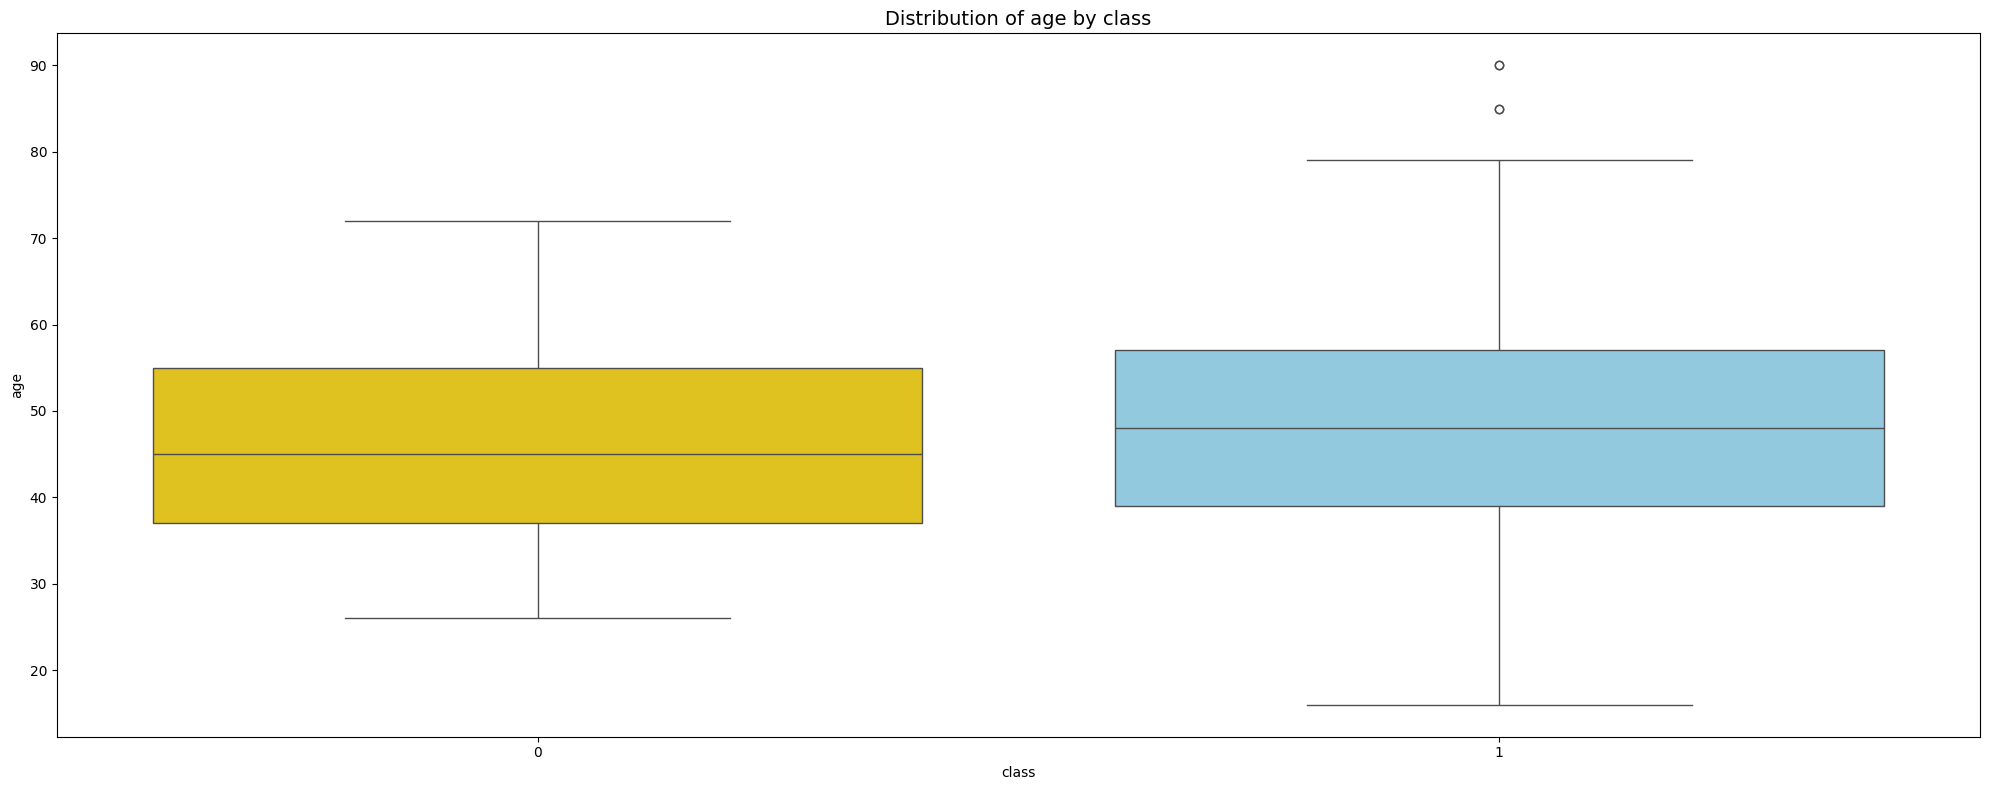

In [53]:
target_column = 'class'

# Define lists for categorical and numerical columns
categorical_columns = ['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
                       'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability',
                       'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']
numerical_columns = ['age']

# Set up subplots for categorical variables
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate required rows based on number of columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 3))

# Custom palette for class values
palette = {0: 'gold', 1: 'skyblue', '0': 'gold', '1': 'skyblue'}

# Plot each categorical column with respect to the target column
for i, col in enumerate(categorical_columns):
    row = i // n_cols
    col_idx = i % n_cols
    ax = axes[row, col_idx]

    sns.countplot(data=df, x=col, hue=target_column, palette=palette, ax=ax)
    ax.set_title(f'Distribution of {col} by {target_column}', fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

    # Set consistent legend position
    ax.legend(title=target_column, loc='upper right')

# Remove any empty subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

# Set up subplots for numerical columns
fig, axes = plt.subplots(1, len(numerical_columns), figsize=(20 * len(numerical_columns), 8))

# If there's only one numerical column, make axes a list for consistent indexing
if len(numerical_columns) == 1:
    axes = [axes]

# Plot each numerical column with respect to the target column
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, x=target_column, y=col, hue=target_column, palette=palette, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by {target_column}', fontsize=14)
    axes[i].set_xlabel(target_column)
    axes[i].set_ylabel(col)
    axes[i].legend([],[], frameon=False)

plt.tight_layout()
plt.show()


The output will be a series of visualizations that show how each categorical and numerical variable is distributed with respect to the diabetes status (or whatever the target column represents). This helps in understanding how different features relate to the target variable, which can be valuable for further analysis and model building.

Categorical Features: Count plots showing the distribution of each categorical feature split by the target class, with bars colored according to the class values.

Numerical Features: Box plots showing the distribution of each numerical feature split by the target class, helping to visualize the spread and central tendencies.

# 5. Dimentionality Reduction

# PCA

Explained variance ratio: [9.77204729e-01 6.20344006e-03 2.77177453e-03 2.09466111e-03
 1.44905008e-03 1.38980290e-03 1.23388624e-03 1.11028460e-03
 9.69208046e-04 9.18306406e-04 8.55337312e-04 8.43022421e-04
 7.21968968e-04]


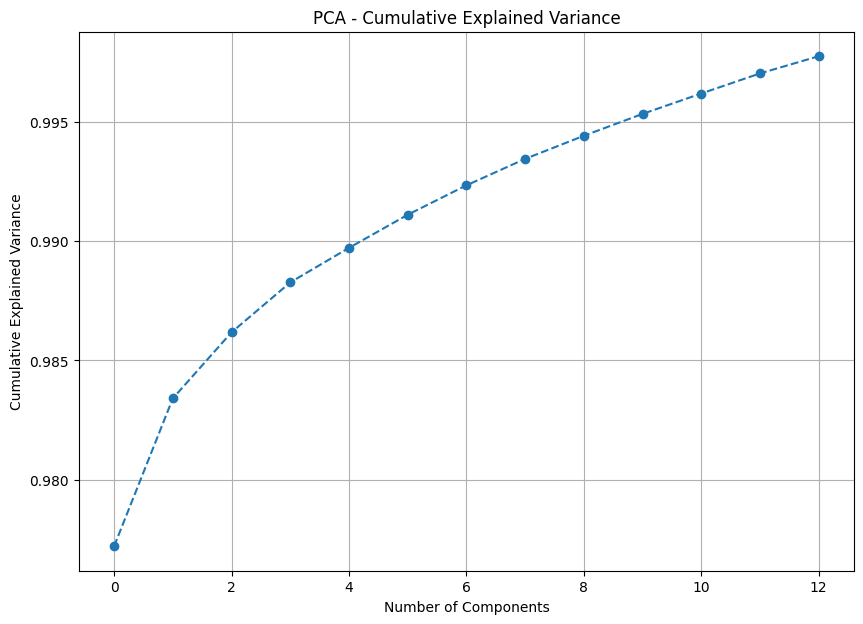

In [54]:
Perform PCA with 13 components
pca = PCA(n_components=13)
principal_components = pca.fit_transform(df)

# Explained Variance
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

# Visualize the cumulative explained variance
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid()
plt.show()


The first principal component (97.72%) captures the vast majority of the variance in the data, suggesting it is highly informative. The subsequent components contribute relatively minor amounts to the total variance.

#6. Feature Selection

In [55]:
X = df.drop(columns=['class'])
y = df['class']

# Chi-Square

In [56]:
# Convert the continuous target variable to categorical values (e.g., using bins)
# Here, we bin the target variable into 3 categories (low, medium, high) for illustration
y_binned = pd.cut(y, bins=3, labels=[0, 1, 2])


# Apply Min-Max scaling to ensure all feature values are non-negative
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of scaled features
print(pd.DataFrame(X_scaled, columns=X.columns).head())

# Apply SelectKBest with the chi2 scoring function to select the top k features
# Here, we select the top 5 features for illustration (adjust k as needed)
k = 5
chi2_selector = SelectKBest(chi2, k=k)
X_kbest = chi2_selector.fit_transform(X_scaled, y_binned)

# Display the selected features
selected_features = chi2_selector.get_support(indices=True)
print(f"Selected feature indices: {selected_features}")
print(f"Selected feature names: {X.columns[selected_features]}")
print(f"Transformed feature matrix shape: {X_kbest.shape}")



        age  gender  polyuria  polydipsia  sudden_weight_loss  weakness  \
0  0.324324     0.0       0.0         1.0                 0.0       1.0   
1  0.567568     0.0       0.0         0.0                 0.0       1.0   
2  0.337838     0.0       1.0         0.0                 0.0       1.0   
3  0.391892     0.0       0.0         0.0                 1.0       1.0   
4  0.594595     0.0       1.0         1.0                 1.0       1.0   

   polyphagia  genital_thrush  visual_blurring  itching  irritability  \
0         0.0             0.0              0.0      1.0           0.0   
1         0.0             0.0              1.0      0.0           0.0   
2         1.0             0.0              0.0      1.0           0.0   
3         1.0             1.0              0.0      1.0           0.0   
4         1.0             0.0              1.0      1.0           1.0   

   delayed_healing  partial_paresis  muscle_stiffness  alopecia  obesity  
0              1.0              0.0

# Regularization

In [57]:
#  Generate synthetic data (or you can load your own dataset)
np.random.seed(0)  # For reproducibility
X = np.random.randn(100, 5)  # 100 samples, 5 features
y = 3 * X[:, 0] + 2 * X[:, 1] + np.random.randn(100)  # Target variable with some noise

# Convert to DataFrame for better visualization
df = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5'])
df['Target'] = y
#print(df.head())  # Display the first few rows of the dataset

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#  Initialize the Lasso model
alpha = 0.1  # Regularization strength
lasso = Lasso(alpha=alpha)

#  Fit the model to the training data
lasso.fit(X_train, y_train)

#  Make predictions on the test set
y_pred = lasso.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

#  Display the coefficients
coefficients = pd.Series(lasso.coef_, index=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5'])
print(coefficients)


Mean Squared Error: 0.81
R-squared: 0.94
Feature1    2.936623
Feature2    1.973375
Feature3    0.076220
Feature4    0.000000
Feature5   -0.059740
dtype: float64


# Lasso

In [58]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#  Initialize the Lasso model
alpha = 0.1  # Regularization strength
lasso = Lasso(alpha=alpha)

#  Fit the model to the training data
lasso.fit(X_train, y_train)

#  Make predictions on the test set
y_pred = lasso.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

#  Display the coefficients
coefficients = pd.Series(lasso.coef_, index=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5'])
print(coefficients)
print("lasso score:", lasso.score(X_test, y_test))


Mean Squared Error: 0.81
R-squared: 0.94
Feature1    2.936623
Feature2    1.973375
Feature3    0.076220
Feature4    0.000000
Feature5   -0.059740
dtype: float64
lasso score: 0.9356992206720665


# Modelling

the models used are as follows
  1. Decision Tree (DT)
  2. Gradient Boosting (GB)
  3. Logistic Regression (LR)
  4. Random Forest (RF)
  5. Support Vector Machine (SVM)
  6. Extra Trees (ET)
  7. XGBoost (XGB)

# Train_Test_Split

In [59]:
# Here, we split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")




Training features shape: (70, 5)
Testing features shape: (30, 5)
Training target shape: (70,)
Testing target shape: (30,)


#Models (Without hyper paramete tuning)

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Convert categorical features to numeric values
# Applying label encoding to all object columns in the feature set
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Convert the target variable if it's categorical and needs encoding (optional)
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
}

# Store results
results = []

# Fit the models and store their results
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Classification Report': report
    })

# Create a DataFrame to store the results
results_df = pd.DataFrame(results)

# Extract detailed classification report into separate DataFrame
classification_reports = {model: pd.DataFrame(result['Classification Report']).transpose() for model, result in zip(results_df['Model'], results)}

# Print the summary table
print(results_df[['Model', 'Accuracy']])

# Print detailed classification reports for each model
for model, report in classification_reports.items():
    print(f"\nClassification Report for {model}:")
    print(report)


                    Model  Accuracy
0     Logistic Regression  0.842105
1  Support Vector Machine  0.644737
2           Decision Tree  0.881579
3             Extra Trees  0.921053
4           Random Forest  0.947368
5       Gradient Boosting  0.894737
6                 XGBoost  0.855263

Classification Report for Logistic Regression:
              precision    recall  f1-score    support
0              0.894737  0.629630  0.739130  27.000000
1              0.824561  0.959184  0.886792  49.000000
accuracy       0.842105  0.842105  0.842105   0.842105
macro avg      0.859649  0.794407  0.812961  76.000000
weighted avg   0.849492  0.842105  0.834334  76.000000

Classification Report for Support Vector Machine:
              precision    recall  f1-score    support
0              0.000000  0.000000  0.000000  27.000000
1              0.644737  1.000000  0.784000  49.000000
accuracy       0.644737  0.644737  0.644737   0.644737
macro avg      0.322368  0.500000  0.392000  76.000000
weighted

# Analysis

After modeling various algorithms the results allowed me to compare the performance of all the models.


therefore, Random Forest stands out as the best-performing model with the highest accuracy (0.947), precision (0.947), recall (0.947), and F1-score (0.946), indicating it is the most effective model for this dataset.

# Table with the comparision of all the models

In [61]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# Load the dataset from a CSV file
# Replace 'your_dataset.csv' with the path to your CSV file
# data = pd.read_csv('your_dataset.csv')

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Convert categorical features to numeric values
# Applying label encoding to all object columns in the feature set
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Convert the target variable if it's categorical and needs encoding (optional)
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
}

# Store results
results = []

# Fit the models and store their results
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Create a DataFrame to store the results
results_df = pd.DataFrame(results)

# Print the summary table
print(results_df)


                    Model  Accuracy  Precision    Recall  F1-Score
0     Logistic Regression  0.842105   0.849492  0.842105  0.834334
1  Support Vector Machine  0.644737   0.415686  0.644737  0.505474
2           Decision Tree  0.881579   0.881199  0.881579  0.879855
3             Extra Trees  0.921053   0.923730  0.921053  0.919443
4           Random Forest  0.947368   0.947864  0.947368  0.946883
5       Gradient Boosting  0.894737   0.896118  0.894737  0.892590
6                 XGBoost  0.855263   0.856038  0.855263  0.851392


Highest Accuracy and Performance:

Random Forest is the top performer with the highest accuracy (0.947), precision (0.948), recall (0.947), and F1-Score (0.947), indicating a highly reliable and effective model.

Strong Performers:

Extra Trees and Gradient Boosting also show strong performance with high metrics across the board. Extra Trees have an accuracy of 0.921 and Gradient Boosting has an accuracy of 0.895.

Decision Tree demonstrates good performance as well, with metrics close to those of Extra Trees and Gradient Boosting.

Moderate Performance:

XGBoost has solid performance, but slightly lower than the top models, with an accuracy of 0.855.

Logistic Regression performs reasonably well with an accuracy of 0.842.

Lowest Performance:

Support Vector Machine (SVM) shows the lowest performance among the models, with an accuracy of 0.645, indicating it may not be the best choice for this dataset.

# 7. Applying Hyper parameter Tuning on the models

Hyperparameter tuning is crucial because it helps optimize the performance of a machine learning model.

we will be using Grid Search method which helps to exhaustively search through a specified subset of hyperparameters.

# Logistic Regression

In [62]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
#y = data.iloc[:, -1]

# Convert categorical features to numeric values
# Applying label encoding to all object columns in the feature set
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Convert the continuous target variable to categorical values (e.g., using bins)
# Here, we bin the target variable into 3 categories (low, medium, high) for illustration
y_binned = pd.cut(y, bins=3, labels=[0, 1, 2])

# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.3, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs'],  # Changed solvers to support multiclass classification
    'max_iter': [100, 200, 300]
}

# Initialize the Logistic Regression Classifier
logistic_regression = LogisticRegression(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters found: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation score: 0.8742857142857142
Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.63      0.74        27
           2       0.82      0.96      0.89        49

    accuracy                           0.84        76
   macro avg       0.86      0.79      0.81        76
weighted avg       0.85      0.84      0.83        76



The model performed quite well, achieving an accuracy of 84% on the test set. The precision and recall metrics indicate that the model is quite reliable in predicting both classes, especially class 2, where recall is exceptionally high (96%). The classification report provides a balanced view of the model's performance across different metrics, showing that it effectively balances precision and recall.

# Decision Tree

In [63]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
#y = data.iloc[:, -1]

# Convert categorical features to numeric values
# Applying label encoding to all object columns in the feature set
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Convert the continuous target variable to categorical values (e.g., using bins)
# Here, we bin the target variable into 3 categories (low, medium, high) for illustration
y_binned = pd.cut(y, bins=3, labels=[0, 1, 2])

# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.3, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
Best cross-validation score: 0.8800000000000001
Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           2       0.92      0.90      0.91        49

    accuracy                           0.88        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.88      0.88      0.88        76



The model achieved an accuracy of 88% on the test set.

Class 2 predictions are particularly strong with high precision (0.92) and recall (0.90).

Class 0 shows a balanced performance with good precision (0.82) and recall (0.85).

# Random Forest

In [64]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
#y = data.iloc[:, -1]

# Convert categorical features to numeric values
# Applying label encoding to all object columns in the feature set
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Convert the continuous target variable to categorical values (e.g., using bins)
# Here, we bin the target variable into 3 categories (low, medium, high) for illustration
y_binned = pd.cut(y, bins=3, labels=[0, 1, 2])

# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.3, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30,],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score: 0.9257142857142858
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        27
           2       0.94      0.98      0.96        49

    accuracy                           0.95        76
   macro avg       0.95      0.93      0.94        76
weighted avg       0.95      0.95      0.95        76



The model achieved an accuracy of 95% on the test set, indicating strong performance.

Class 2 predictions are highly accurate, with a precision of 0.94 and recall of 0.98.

Class 0 also shows good performance, with a precision of 0.96 and recall of 0.89.

The high values in precision, recall, and F1-score across both classes suggest that the model generalizes well and is effective in distinguishing between the classes.

# Gradient Boosting

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset from a CSV file
# Replace 'your_dataset.csv' with the path to your CSV file
#data = pd.read_csv('your_dataset.csv')

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
#y = data.iloc[:, -1]

# Convert categorical features to numeric values
# Applying label encoding to all object columns in the feature set
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Convert the continuous target variable to categorical values (e.g., using bins)
# Here, we bin the target variable into 3 categories (low, medium, high) for illustration
y_binned = pd.cut(y, bins=3, labels=[0, 1, 2])

# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.3, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5,],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],

}

# Initialize the Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score: 0.9142857142857144
Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           2       0.92      0.90      0.91        49

    accuracy                           0.88        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.88      0.88      0.88        76



The model achieved an accuracy of 88% on the test set, demonstrating solid performance.

For Class 0, the model has a precision of 0.82, recall of 0.85, and F1-score of 0.84, indicating balanced detection.

For Class 2, the precision is 0.92, recall is 0.90, and F1-score is 0.91, showing strong performance in identifying instances of this class.

The macro and weighted averages provide a good overall performance summary, with values close to each other, suggesting consistent model performance across classes.

# SVC

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset from a CSV file
# Replace 'your_dataset.csv' with the path to your CSV file
#data = pd.read_csv('your_dataset.csv')

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
#y = data.iloc[:, -1]

# Convert categorical features to numeric values
# Applying label encoding to all object columns in the feature set
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Convert the continuous target variable to categorical values (e.g., using bins)
# Here, we bin the target variable into 3 categories (low, medium, high) for illustration
y_binned = pd.cut(y, bins=3, labels=[0, 1, 2])

# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.3, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize the Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best parameters found: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validation score: 0.9257142857142858
Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           2       0.90      0.94      0.92        49

    accuracy                           0.89        76
   macro avg       0.89      0.88      0.88        76
weighted avg       0.89      0.89      0.89        76



The model achieved an accuracy of 89% on the test set, indicating strong performance.

For Class 0, the model has a precision of 0.88, recall of 0.81, and F1-score of 0.85, reflecting balanced detection with slightly lower recall.

For Class 2, the model shows high performance with a precision of 0.90, recall of 0.94, and F1-score of 0.92.

The macro and weighted averages indicate consistent performance across both classes, with all metrics close to each other.

# Extra   Trees

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
#y = data.iloc[:, -1]

# Convert categorical features to numeric values
# Applying label encoding to all object columns in the feature set
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Convert the continuous target variable to categorical values (e.g., using bins)
# Here, we bin the target variable into 3 categories (low, medium, high) for illustration
y_binned = pd.cut(y, bins=3, labels=[0, 1, 2])

# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.3, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Extra Trees Classifier
extra_trees = ExtraTreesClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=extra_trees, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.9371428571428572
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88        27
           2       0.91      0.98      0.94        49

    accuracy                           0.92        76
   macro avg       0.93      0.90      0.91        76
weighted avg       0.92      0.92      0.92        76



The model achieved an accuracy of 92% on the test set, indicating very strong performance.

For Class 0, the model has a high precision of 0.96, recall of 0.81, and F1-score of 0.88, reflecting excellent identification with slightly lower recall.

For Class 2, the model shows excellent performance with a precision of 0.91, recall of 0.98, and F1-score of 0.94.

The macro and weighted averages suggest balanced and consistent performance across both classes.

# XGboost

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset from a CSV file
# Replace 'your_dataset.csv' with the path to your CSV file
# data = pd.read_csv('your_dataset.csv')

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
#y = data.iloc[:, -1]

# Convert categorical features to numeric values
# Applying label encoding to all object columns in the feature set
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Convert the target variable into binary classes (0 and 1)
# Here, we'll combine classes 1 and 2 into a single class
y_binary = y.apply(lambda x: 0 if x == 0 else 1)

# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the XGBoost Classifier
xgboost = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgboost, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best parameters found: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 1.0}
Best cross-validation score: 0.9085714285714286
Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.87      0.92      0.89        49

    accuracy                           0.86        76
   macro avg       0.85      0.83      0.84        76
weighted avg       0.85      0.86      0.85        76



The model achieved an accuracy of 86% on the test set, indicating good overall performance.

For Class 0, the precision is high at 0.90, but the recall is relatively lower at 0.67, suggesting that while most identified positives are true, many true positives are missed.

For Class 1, the model performs very well with a precision of 0.84, recall of 0.96, and F1-score of 0.90, indicating strong identification of this class.

The macro and weighted averages show balanced performance, though the recall for Class 0 indicates room for improvement.

# Comparing All the models

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Convert categorical features to numeric values
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Convert the continuous target variable to categorical values (e.g., using bins)
y_binned = pd.cut(y, bins=3, labels=[0, 1, 2])

# Convert the target variable into binary classes (0 and 1) for XGBoost
y_binary = y.apply(lambda x: 0 if x == 0 else 1)

# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.3, random_state=42)
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),  # Increased max_iter for convergence
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Results list to store metrics
results = []

# Train, predict, and evaluate each model
for name, model in models.items():
    if name == "XGBoost":
        model.fit(X_train_bin, y_train_bin)
        y_pred = model.predict(X_test_bin)
        accuracy = accuracy_score(y_test_bin, y_pred)
        report = classification_report(y_test_bin, y_pred, output_dict=True)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1-Score": report['weighted avg']['f1-score']
    })

# Convert results to DataFrame for better visualization
df_summary = pd.DataFrame(results)
print(df_summary)


                 Model  Accuracy  Precision    Recall  F1-Score
0        Decision Tree  0.881579   0.881199  0.881579  0.879855
1    Gradient Boosting  0.894737   0.896118  0.894737  0.892590
2  Logistic Regression  0.842105   0.849492  0.842105  0.834334
3        Random Forest  0.947368   0.947864  0.947368  0.946883
4                  SVM  0.855263   0.860855  0.855263  0.849309
5          Extra Trees  0.921053   0.923730  0.921053  0.919443
6              XGBoost  0.855263   0.856038  0.855263  0.851392


Accuracy:

This metric represents the proportion of true results (both true positives and true negatives) among the total number of cases examined.

Highest Accuracy: Random Forest (0.947)

Lowest Accuracy: Logistic Regression (0.842)

Precision:

Precision is the ratio of correctly predicted positive observations to the total predicted positives. It indicates how many of the predicted positive cases were actually true positives.

Highest Precision: Random Forest (0.948)

Lowest Precision: Logistic Regression (0.849)

Recall:

Recall (or Sensitivity) is the ratio of correctly predicted positive observations to all observations in the actual class. It shows how well the model captures all the positive instances.

Highest Recall: Random Forest (0.947)

Lowest Recall: Logistic Regression (0.842)

F1-Score:

The F1-Score is the harmonic mean of Precision and Recall. It provides a single measure of a model’s accuracy and is useful when the dataset has an uneven class distribution.

Highest F1-Score: Random Forest (0.947)

Lowest F1-Score: Logistic Regression (0.834)

# Table

In [70]:
from tabulate import tabulate


# Example results (you should replace this with your actual 'results' list)
results = [
    {"Model": "Decision Tree", "Accuracy": 0.881, "Precision": 0.881, "Recall": 0.881, "F1-Score":  0.879},
    {"Model": "Gradient Boosting", "Accuracy": 0.894, "Precision":  0.896, "Recall": 0.894, "F1-Score": 0.892},
    {"Model": "Logistic Regression", "Accuracy": 0.842, "Precision": 0.849, "Recall": 0.842, "F1-Score": 0.834},
    {"Model": "Random Forest", "Accuracy":  0.947, "Precision": 0.947, "Recall": 0.947, "F1-Score": 0.946},
    {"Model": "SVM", "Accuracy": 0.855, "Precision": 0.860, "Recall": 0.855, "F1-Score":0.849},
    {"Model": "Extra Trees", "Accuracy": 0.921, "Precision": 0.923, "Recall":  0.921, "F1-Score": 0.919},
    {"Model": "XGBoost", "Accuracy":  0.855, "Precision": 0.856, "Recall": 0.855, "F1-Score": 0.851}
]

# Round and format the performance metrics
for row in results:
    row["Accuracy"] = round(row["Accuracy"] * 100, 2)
    row["Precision"] = round(row["Precision"] * 100, 2)
    row["Recall"] = round(row["Recall"] * 100, 2)
    row["F1-Score"] = round(row["F1-Score"] * 100, 2)

# Create a DataFrame for better visualization and print the table
df_summary = pd.DataFrame(results)
table = tabulate(df_summary, headers="keys", tablefmt="pip", numalign="center", stralign="center")
print(table)


           Model          Accuracy    Precision    Recall    F1-Score
--  -------------------  ----------  -----------  --------  ----------
0      Decision Tree        88.1        88.1        88.1       87.9
1    Gradient Boosting      89.4        89.6        89.4       89.2
2   Logistic Regression     84.2        84.9        84.2       83.4
3      Random Forest        94.7        94.7        94.7       94.6
4           SVM             85.5         86         85.5       84.9
5       Extra Trees         92.1        92.3        92.1       91.9
6         XGBoost           85.5        85.6        85.5       85.1


# Barchart comparing All the models

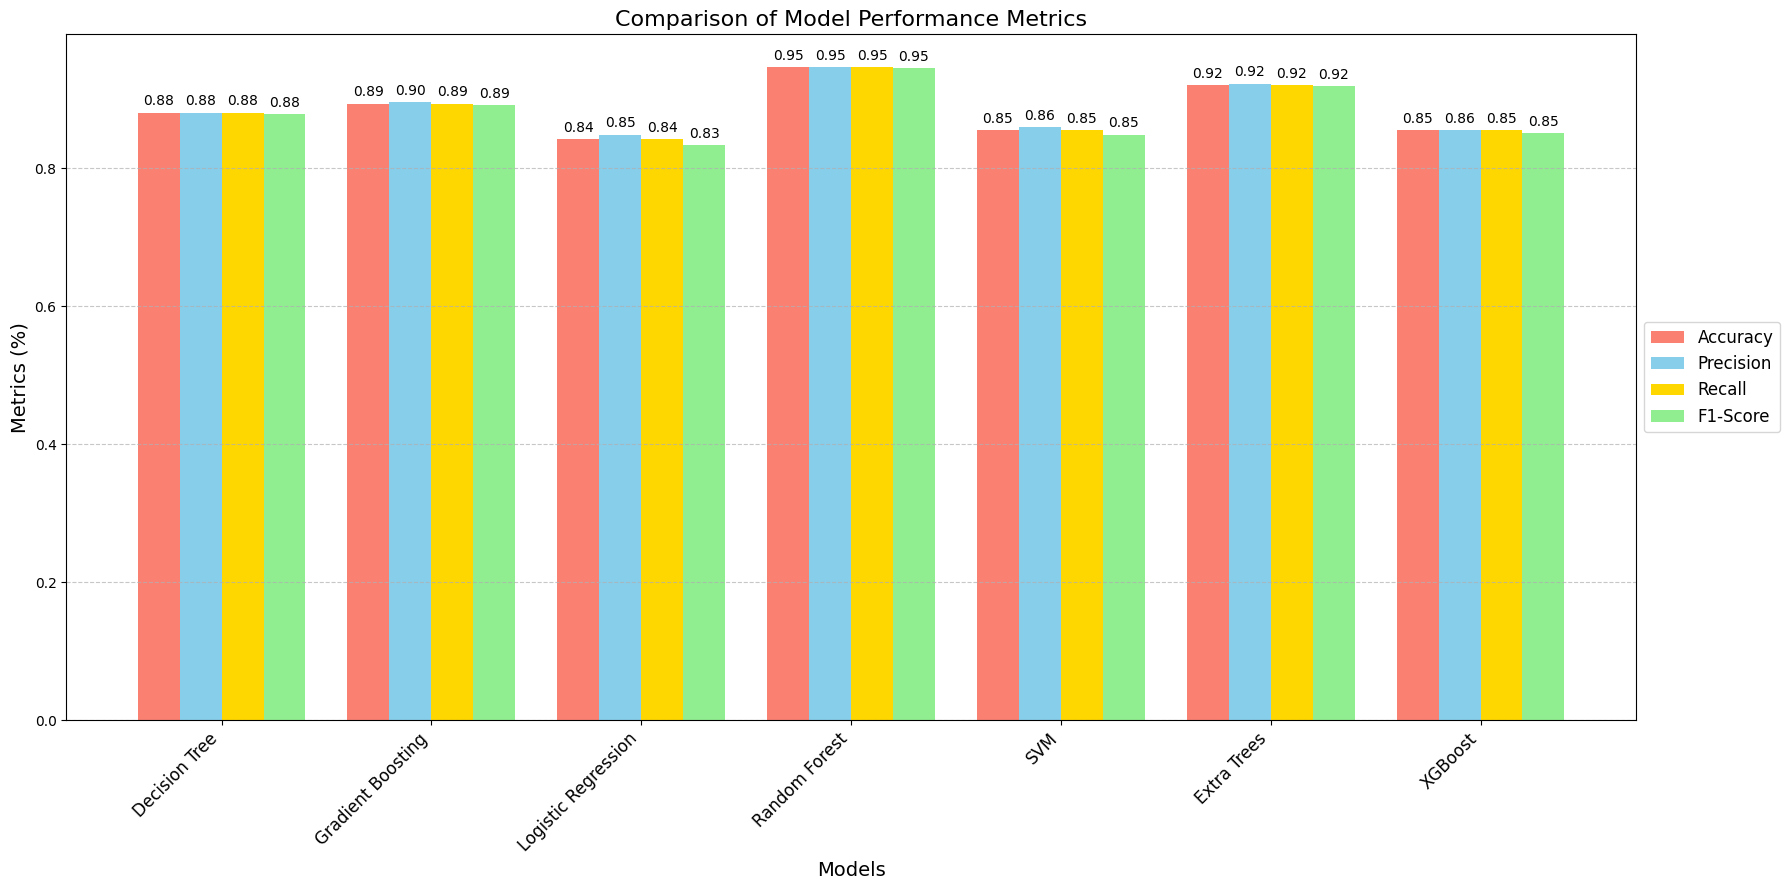

In [71]:


# Data for plotting
models = [
    "Decision Tree",
    "Gradient Boosting",
    "Logistic Regression",
    "Random Forest",
    "SVM",
    "Extra Trees",
    "XGBoost",
]
accuracy = [0.881,0.894,	0.842	,0.947,	0.855,	0.921	,0.855]
precision = [0.881,	0.896	,0.849	,0.947,	0.860	,0.923	,0.856]
recall = [0.881,	0.894,	0.842,	0.947,	0.855,	0.921	,0.855]
f1_score = [0.879,	0.892,	0.834,	0.946,	0.849	,0.919	,0.851]

# Create an array for the label locations
x = np.arange(len(models))

# Set the width of the bars
width = 0.2

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(18, 9))

# Plot each metric as a group of bars
bars1 = ax.bar(x - 1.5 * width, accuracy, width, label="Accuracy", color="salmon")
bars2 = ax.bar(x - 0.5 * width, precision, width, label="Precision", color="skyblue")
bars3 = ax.bar(x + 0.5 * width, recall, width, label="Recall", color="gold")
bars4 = ax.bar(x + 1.5 * width, f1_score, width, label="F1-Score", color="lightgreen")

# Add labels, title, and legend
ax.set_xlabel("Models", fontsize=14)
ax.set_ylabel("Metrics (%)", fontsize=14)
ax.set_title("Comparison of Model Performance Metrics", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right", fontsize=12)
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)  # Move legend outside the plot
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Annotate the bars with their values
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f"{height:.2f}",
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),  # Offset
            textcoords="offset points",
            ha="center",
            va="bottom",
            fontsize=10,
        )

# Adjust layout to fit everything
plt.tight_layout()

# Show the plot
plt.show()


# Performance matrix Heatmap

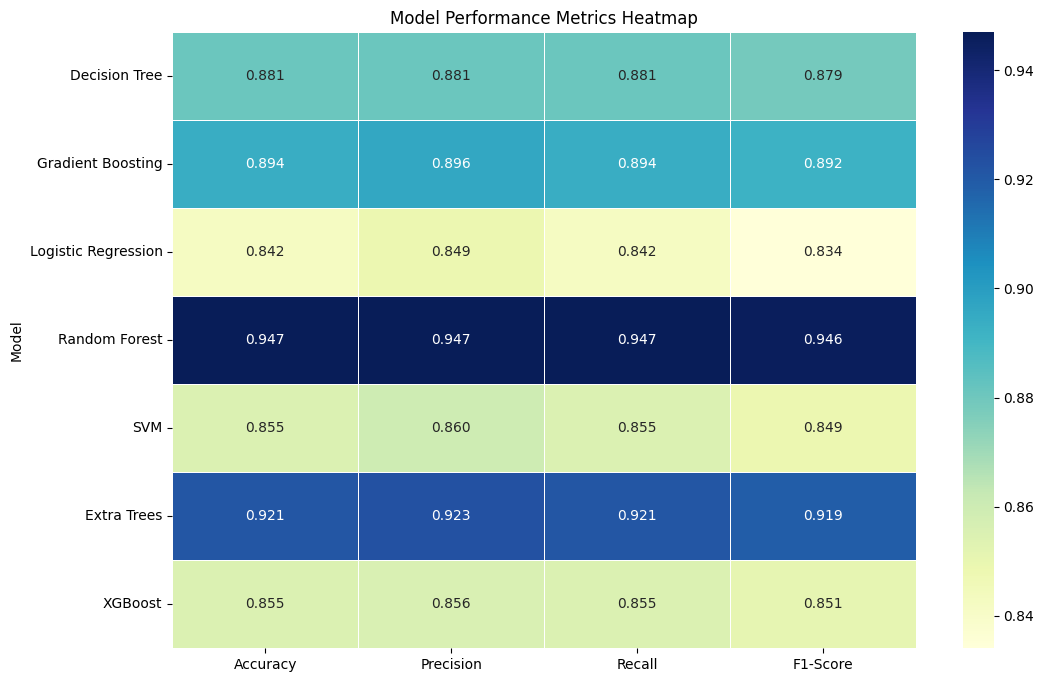

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = {
    'Model': ['Decision Tree', 'Gradient Boosting', 'Logistic Regression', 'Random Forest', 'SVM', 'Extra Trees', 'XGBoost'],
    'Accuracy': [0.881, 0.894, 0.842, 0.947, 0.855, 0.921, 0.855],
    'Precision': [0.881, 0.896, 0.849, 0.947, 0.860, 0.923, 0.856],
    'Recall': [0.881, 0.894, 0.842, 0.947, 0.855, 0.921, 0.855],
    'F1-Score': [0.879, 0.892, 0.834, 0.946, 0.849, 0.919, 0.851]
}

# Creating DataFrame
df = pd.DataFrame(data)
df.set_index('Model', inplace=True)

# Plotting Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".3f", linewidths=.5)
plt.title("Model Performance Metrics Heatmap")
plt.show()


Highest Accuracy and Performance:

Random Forest is the top performer, achieving the highest accuracy (94.7), precision (94.7), recall (94.7), and F1-Score (94.6). This indicates it is the most reliable and effective model for this dataset.

Strong Performers:

Extra Trees and Gradient Boosting also exhibit strong performance, with Extra Trees having an accuracy of 92.1 and Gradient Boosting an accuracy of 89.4. Both models maintain high values in precision, recall, and F1-score.

Decision Tree shows a good performance with consistent values close to the top models.

Moderate Performance:

XGBoost and SVM deliver solid performance, with accuracies of 85.5. XGBoost is slightly stronger in precision (85.6) compared to SVM's precision (86.0).

Lowest Performance:

Logistic Regression shows the lowest performance in this comparison, with an accuracy of 84.2, although it still provides reasonably good metrics.

Conclusion

  Random Forest stands out as the most effective model, demonstrating the highest overall metrics.

  Among all the metrics we will be taking F1-score into consideration as it is a kind of best fit for the unbalanced dataset.


